In [1]:
import pandas as pd

import numpy as np

import os

import glob

import requests

from bs4 import BeautifulSoup

import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats

import warnings

warnings.filterwarnings('ignore')

In [2]:
all_files = glob.glob(os.getcwd() + os.path.sep + "Realtor_com" + os.path.sep + "*.csv", recursive = True)

In [3]:
df = pd.DataFrame([])

i = 0

for file in all_files:
    
    temp_df = pd.read_csv(file)
    
    temp_df['city'] = temp_df['city'].apply(lambda row: temp_df['city'][0])
    
    df = df.append(temp_df, ignore_index = True)
    
    i += 1
    
    print("Loading: " + str(i) + "/" + str(len(all_files) ), end = "\r")

In [4]:
df.head(3)

,property_url,mls,mls_id,status,style,street,unit,city,state,zip_code,...,last_sold_date,lot_sqft,price_per_sqft,latitude,longitude,stories,hoa_fee,parking_garage,primary_photo,alt_photos
0,https://www.realtor.com/realestateandhomes-det...,SFCA,424003970,SOLD,PropertyType.SINGLE_FAMILY,1533 Lincoln Ave,NaN,Alameda,CA,94501,...,2024-03-20,2500.0,564.0,37.774679,-122.259210,NaN,0.0,NaN,http://ap.rdcpix.com/46e937624ac59a94bb961b19f...,http://ap.rdcpix.com/46e937624ac59a94bb961b19f...
1,https://www.realtor.com/realestateandhomes-det...,BYCA,41048925,SOLD,PropertyType.CONDOS,301 Broadway,Apt 312,Alameda,CA,94501,...,2024-03-15,42671.0,590.0,37.753598,-122.246966,NaN,570.0,1.0,http://ap.rdcpix.com/d0a01d67107580b4a51123b66...,http://ap.rdcpix.com/d0a01d67107580b4a51123b66...
2,https://www.realtor.com/realestateandhomes-det...,SJCA,ML81953634,SOLD,PropertyType.TOWNHOMES,3444 Capella Ln,NaN,Alameda,CA,94502,...,2024-03-15,2268.0,738.0,37.732937,-122.236143,1.0,550.0,2.0,http://ap.rdcpix.com/26de145011e32dd0866cb19ad...,http://ap.rdcpix.com/26de145011e32dd0866cb19ad...


In [5]:
# Selecting columns

df = df.loc[:, ['mls_id', 'style', 'street', 'city', 'state', 'zip_code', 'beds', 'full_baths'
                , 'half_baths', 'sqft', 'year_built', 'days_on_mls', 'list_price', 'list_date', 'sold_price'
                , 'last_sold_date', 'lot_sqft', 'price_per_sqft', 'latitude', 'longitude','stories'
                , 'hoa_fee', 'parking_garage']]

df.head(3)

,mls_id,style,street,city,state,zip_code,beds,full_baths,half_baths,sqft,...,list_date,sold_price,last_sold_date,lot_sqft,price_per_sqft,latitude,longitude,stories,hoa_fee,parking_garage
0,424003970,PropertyType.SINGLE_FAMILY,1533 Lincoln Ave,Alameda,CA,94501,2.0,2.0,NaN,1028.0,...,2024-01-22,580000.0,2024-03-20,2500.0,564.0,37.774679,-122.259210,NaN,0.0,NaN
1,41048925,PropertyType.CONDOS,301 Broadway,Alameda,CA,94501,2.0,2.0,NaN,983.0,...,2024-02-01,580000.0,2024-03-15,42671.0,590.0,37.753598,-122.246966,NaN,570.0,1.0
2,ML81953634,PropertyType.TOWNHOMES,3444 Capella Ln,Alameda,CA,94502,2.0,2.0,NaN,1247.0,...,2024-02-07,920000.0,2024-03-15,2268.0,738.0,37.732937,-122.236143,1.0,550.0,2.0


In [6]:
i = 0

for city in df.city.unique().tolist():
    
    city_name = city.lower().replace(" ", "+") + '-ca'

#     lat_info = str(df['latitude'][i])[:-1]

#     long_info = str(df['longitude'][i])[1:10]

    base_url = 'https://www.areavibes.com/{0}'.format(city_name)

    response = requests.get(base_url)

    soup = BeautifulSoup(response.content, 'lxml')
    
    df.loc[df['city'] == city, 'livability_score'] = soup.find('span', class_='cw-score-numerator').text.strip()
    
    details = soup.find_all('div', class_ = "liv-header ac-header")
    
    for item in details:
        
        df.loc[df['city'] == city, item.text.split("\n\n")[2].strip().replace(" ", "_")] = item.text.split("\n\n")[3].strip()
        
    i += 1
        
    print("Loading: " + str(i) + "/" + str(df.city.nunique()), end = "\r")

In [7]:
df.head()

,mls_id,style,street,city,state,zip_code,beds,full_baths,half_baths,sqft,...,livability_score,amenities,commute,cost_of_living,crime,employment,health,housing,schools,ratings
0,424003970,PropertyType.SINGLE_FAMILY,1533 Lincoln Ave,Alameda,CA,94501,2.0,2.0,NaN,1028.0,...,69,F,A+,F,D-,A+,B+,B-,B,D+
1,41048925,PropertyType.CONDOS,301 Broadway,Alameda,CA,94501,2.0,2.0,NaN,983.0,...,69,F,A+,F,D-,A+,B+,B-,B,D+
2,ML81953634,PropertyType.TOWNHOMES,3444 Capella Ln,Alameda,CA,94502,2.0,2.0,NaN,1247.0,...,69,F,A+,F,D-,A+,B+,B-,B,D+
3,41050640,PropertyType.SINGLE_FAMILY,5 Plover Ct,Alameda,CA,94501,3.0,2.0,1.0,1590.0,...,69,F,A+,F,D-,A+,B+,B-,B,D+
4,41048177,PropertyType.SINGLE_FAMILY,1304 Fernside Blvd,Alameda,CA,94501,3.0,2.0,NaN,2334.0,...,69,F,A+,F,D-,A+,B+,B-,B,D+


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30948 entries, 0 to 30947
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mls_id            30948 non-null  object 
 1   style             30948 non-null  object 
 2   street            30940 non-null  object 
 3   city              30948 non-null  object 
 4   state             30948 non-null  object 
 5   zip_code          30948 non-null  int64  
 6   beds              30566 non-null  float64
 7   full_baths        29925 non-null  float64
 8   half_baths        8666 non-null   float64
 9   sqft              30373 non-null  float64
 10  year_built        30196 non-null  float64
 11  days_on_mls       21872 non-null  float64
 12  list_price        30948 non-null  int64  
 13  list_date         30948 non-null  object 
 14  sold_price        30945 non-null  float64
 15  last_sold_date    30948 non-null  object 
 16  lot_sqft          26392 non-null  float6

Text(0, 0.5, 'Feature Names')

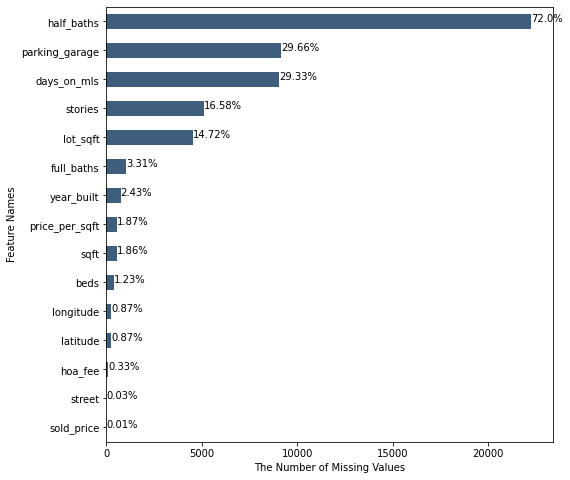

In [9]:
# Nan is the list of features, have null values

Nan = df.isnull().sum()[df.isnull().sum() > 0]

Nan.sort_values().plot(kind = 'barh', figsize = (8, 8), color = "#3F5D7D");

for y, x in enumerate(Nan.sort_values()):
    
    plt.annotate(str(round(x/df.shape[0]*100,2))+'%', xy=(x, y), size=10)
    
plt.xlabel('The Number of Missing Values')

plt.ylabel('Feature Names')

In [10]:
df['half_baths'].fillna(0, inplace = True)

df['style'] = df['style'].apply(lambda row: row.replace("PropertyType.", "").replace("_", " ").lower())

df.dropna(subset = ['parking_garage', 'days_on_mls', 'stories', 'lot_sqft', 'full_baths', 'year_built'
                    , 'price_per_sqft', 'sqft', 'beds', 'longitude', 'latitude', 'hoa_fee', 'street'
                    , 'sold_price'], inplace = True)

df.reset_index(drop = True, inplace = True)

In [11]:
df.head(3)

,mls_id,style,street,city,state,zip_code,beds,full_baths,half_baths,sqft,...,livability_score,amenities,commute,cost_of_living,crime,employment,health,housing,schools,ratings
0,ML81953634,townhomes,3444 Capella Ln,Alameda,CA,94502,2.0,2.0,0.0,1247.0,...,69,F,A+,F,D-,A+,B+,B-,B,D+
1,41050640,single family,5 Plover Ct,Alameda,CA,94501,3.0,2.0,1.0,1590.0,...,69,F,A+,F,D-,A+,B+,B-,B,D+
2,41048177,single family,1304 Fernside Blvd,Alameda,CA,94501,3.0,2.0,0.0,2334.0,...,69,F,A+,F,D-,A+,B+,B-,B,D+


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11635 entries, 0 to 11634
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mls_id            11635 non-null  object 
 1   style             11635 non-null  object 
 2   street            11635 non-null  object 
 3   city              11635 non-null  object 
 4   state             11635 non-null  object 
 5   zip_code          11635 non-null  int64  
 6   beds              11635 non-null  float64
 7   full_baths        11635 non-null  float64
 8   half_baths        11635 non-null  float64
 9   sqft              11635 non-null  float64
 10  year_built        11635 non-null  float64
 11  days_on_mls       11635 non-null  float64
 12  list_price        11635 non-null  int64  
 13  list_date         11635 non-null  object 
 14  sold_price        11635 non-null  float64
 15  last_sold_date    11635 non-null  object 
 16  lot_sqft          11635 non-null  float6

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
zip_code,11635.0,9.468849e+04,4.384558e+02,92881.000000,9.430300e+04,9.480600e+04,9.512000e+04,9.514800e+04
beds,11635.0,3.439364e+00,9.732529e-01,0.000000,3.000000e+00,3.000000e+00,4.000000e+00,1.200000e+01
full_baths,11635.0,2.247529e+00,8.344646e-01,1.000000,2.000000e+00,2.000000e+00,3.000000e+00,9.000000e+00
half_baths,11635.0,3.490331e-01,4.994045e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00
sqft,11635.0,1.915704e+03,1.459162e+03,517.000000,1.330000e+03,1.704000e+03,2.231500e+03,1.298400e+05
year_built,11635.0,1.968472e+03,2.424171e+01,1876.000000,1.954000e+03,1.965000e+03,1.983000e+03,2.024000e+03
days_on_mls,11635.0,4.632101e+01,3.664692e+01,0.000000,2.800000e+01,3.600000e+01,5.100000e+01,6.420000e+02
list_price,11635.0,1.839120e+06,1.125198e+06,85000.000000,1.188000e+06,1.549000e+06,2.198000e+06,2.250000e+07
sold_price,11635.0,1.909980e+06,1.106649e+06,85000.000000,1.235856e+06,1.625000e+06,2.300000e+06,1.800000e+07
lot_sqft,11635.0,1.135324e+06,6.994022e+07,50.000000,4.869000e+03,6.213000e+03,8.428500e+03,4.356000e+09


In [14]:
df.to_csv("raw_data.csv", index = False)